Тестовое задание:

Цель: разработать скрипт для сбора и обработки данных с использованием API Binance и прогнозирования временных рядов с помощью LSTM-модели.

Этапы выполнения задания:

1. Изучить документацию RESTful API Binance (https://binance-docs.github.io/apidocs/spot/en/) и написать скрипт на Python с использованием библиотеки Requests, чтобы получить данные о котировках криптовалют. Сохранить полученные данные в формате CSV.

2. Загрузить полученный CSV-файл с данными в Python с использованием библиотеки Pandas и выполнить предварительную обработку данных (например, удаление пропусков, преобразование даты и времени, масштабирование).

3. С использованием библиотеки NumPy, разделить данные на обучающую и тестовую выборки.

4. Создать и обучить LSTM-модель с использованием библиотеки Keras или TensorFlow на основе подготовленных данных. Подобрать архитектуру и гиперпараметры модели, чтобы достичь наилучшего качества прогнозирования.

5. Оценить качество модели на тестовой выборке, используя подходящие метрики, такие как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).

6. Визуализировать предсказания модели для тестовой выборки на графике с помощью библиотеки Matplotlib или Plotly. Вывести график с предсказанием на час вперед от последних полученных данных.

In [1]:
import requests
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
api_key = ''
api_secret = ''
# задаем список торговых пар
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'LTCUSDT']
interval = '1d'
limit = 1000

for symbol in symbols:
    url = f'https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}'
    response = requests.get(url, headers={'X-MBX-APIKEY': api_key})

    if response.status_code == 200:
        info = response.json()
        data = pd.DataFrame(info)
        df = pd.DataFrame()
        df['date'] = data.iloc[:,0]
        df['date'] = pd.to_datetime(df['date'], unit='ms')
        df['open'] = data.iloc[:,1].astype(float)
        df['high'] = data.iloc[:,2].astype(float)
        df['low'] = data.iloc[:,3].astype(float)
        df['close'] = data.iloc[:,4].astype(float)
        df['volume_coin'] = data.iloc[:,5].astype(float)
        df['volume_usd'] = data.iloc[:,7].astype(float)
        df['trades'] = data.iloc[:,8].astype(float)
        df.to_csv(f'binance_quotes_{symbol}.csv', index=False)
        print(f'Данные сохранены по {symbol}')
    else:
        print(f"Ошибка запроса по {symbol}. HTTP статус: {response.status_code}")


Данные сохранены по BTCUSDT
Данные сохранены по ETHUSDT
Данные сохранены по BNBUSDT
Данные сохранены по XRPUSDT
Данные сохранены по LTCUSDT


In [77]:
# прочитаем полученные данные
df_btc = pd.read_csv('binance_quotes_BTCUSDT.csv')
# df_eth = pd.read_csv('binance_quotes_ETHUSDT.csv')
# df_bnb = pd.read_csv('binance_quotes_BNBUSDT.csv')
# df_ltc = pd.read_csv('binance_quotes_LTCUSDT.csv')
# df_xrp = pd.read_csv('binance_quotes_XRPUSDT.csv')

Посторим графики цены, для каждой монеты

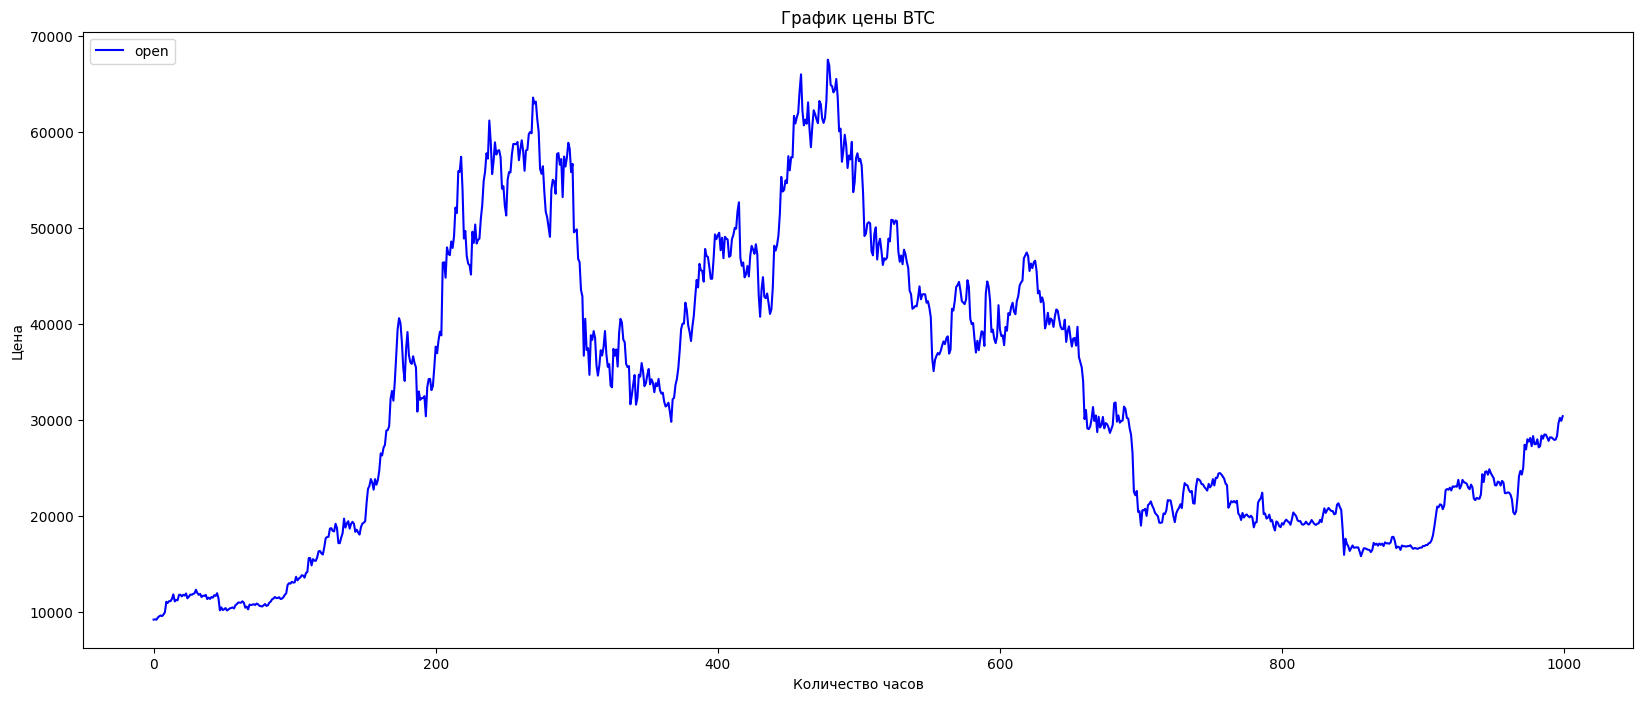

In [13]:
# BTC

plt.figure(figsize=(20, 8))
plt.plot(df_btc['open'], color="blue")
# plt.plot(df_btc['high'])
# plt.plot(df_btc['low'])
# plt.plot(df_btc['close'], color='red')
plt.title('График цены BTC')
plt.ylabel('Цена')
plt.xlabel('Количество часов')
plt.legend(['open', 'close'], loc='upper left')
plt.show()

In [ ]:
# # ETH
#
# plt.figure(figsize=(16,6))
# plt.plot(df_eth['open'], color='blue')
# # plt.plot(df_eth['high'])
# # plt.plot(df_eth['low'])
# # plt.plot(df_eth['close'])
# plt.title(f'График цены ETH')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # BNB
#
# plt.figure(figsize=(16,6))
# plt.plot(df_bnb['open'], color='blue')
# # plt.plot(df_bnb['high'])
# # plt.plot(df_bnb['low'])
# # plt.plot(df_bnb['close'])
# plt.title(f'График цены BNB')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # LTC
#
# plt.figure(figsize=(16,6))
# plt.plot(df_ltc['open'], color='blue')
# # plt.plot(df_ltc['high'])
# # plt.plot(df_ltc['low'])
# # plt.plot(df_ltc['close'])
# plt.title(f'График цены LTC')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # XRP
# plt.figure(figsize=(16,6))
# plt.plot(df_xrp['open'], color='blue')
# # plt.plot(df_xrp['high'])
# # plt.plot(df_xrp['low'])
# # plt.plot(df_xrp['close'])
# plt.title(f'График цены XRP')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

Проверим, влияли ли количество объема, на изменение цены

<Axes: xlabel='date', ylabel='close'>

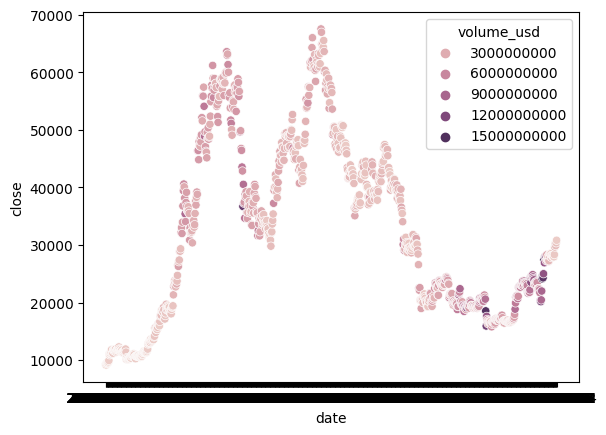

In [14]:
# BTC
sns.scatterplot(data=df_btc, x='date', y='close', hue='volume_usd')

In [ ]:
# ETH
# sns.scatterplot(data=df_eth, x='date', y='close', hue='volume_usd')

In [ ]:
# BNB
# sns.scatterplot(data=df_bnb, x='date', y='close',hue='volume_usd')

In [ ]:
# LTC
# sns.scatterplot(data=df_ltc, x='date', y='close', hue='volume_usd')

In [ ]:
# XRP
# sns.scatterplot(data=df_xrp, x='date', y='close', hue='volume_usd')

Дальнейшая работа будет проводиться с данными по BTC

Разделение на тренировочный и тестовый. Нормализация данных

In [15]:
df_btc

,date,open,high,low,close,volume_coin,volume_usd,trades
0,2020-07-19,9170.30,9232.27,9101.35,9208.99,26052.019417,2.385220e+08,440449.0
1,2020-07-20,9208.99,9221.52,9131.00,9160.78,35458.764082,3.252973e+08,557096.0
2,2020-07-21,9160.78,9437.73,9152.80,9390.00,60413.582486,5.633605e+08,782959.0
3,2020-07-22,9390.00,9544.00,9261.00,9518.16,48815.004107,4.577761e+08,663029.0
4,2020-07-23,9518.16,9664.00,9440.33,9603.27,51856.233500,4.942829e+08,735371.0
...,...,...,...,...,...,...,...,...
995,2023-04-10,28323.76,29770.00,28170.00,29637.34,67754.062200,1.955301e+09,1285695.0
996,2023-04-11,29637.35,30550.00,29590.00,30200.42,67990.076210,2.046078e+09,1340458.0
997,2023-04-12,30200.43,30486.00,29637.40,29888.07,62049.484510,1.863498e+09,1246556.0
998,2023-04-13,29888.07,30595.00,29854.59,30373.84,51934.117310,1.571091e+09,1054144.0


In [78]:
df_btc.index = df_btc['date']

In [29]:
df_btc

,date,open,high,low,close,volume_coin,volume_usd,trades
date,,,,,,,,
2020-07-19,2020-07-19,9170.30,9232.27,9101.35,9208.99,26052.019417,2.385220e+08,440449.0
2020-07-20,2020-07-20,9208.99,9221.52,9131.00,9160.78,35458.764082,3.252973e+08,557096.0
2020-07-21,2020-07-21,9160.78,9437.73,9152.80,9390.00,60413.582486,5.633605e+08,782959.0
2020-07-22,2020-07-22,9390.00,9544.00,9261.00,9518.16,48815.004107,4.577761e+08,663029.0
2020-07-23,2020-07-23,9518.16,9664.00,9440.33,9603.27,51856.233500,4.942829e+08,735371.0
...,...,...,...,...,...,...,...,...
2023-04-10,2023-04-10,28323.76,29770.00,28170.00,29637.34,67754.062200,1.955301e+09,1285695.0
2023-04-11,2023-04-11,29637.35,30550.00,29590.00,30200.42,67990.076210,2.046078e+09,1340458.0
2023-04-12,2023-04-12,30200.43,30486.00,29637.40,29888.07,62049.484510,1.863498e+09,1246556.0


In [79]:
# Длина временной точки
time_stamp = 21
  
# Разделить обучающий набор и проверочный набор
data = df_btc[['open', 'high', 'low', 'close', 'volume_coin', 'trades']]  #  'Volume'
train = data[0:750 + time_stamp]
valid = data[750 - time_stamp:]

In [80]:
train.shape, valid.shape

((771, 6), (271, 6))

In [81]:
train.head()

,open,high,low,close,volume_coin,trades
date,,,,,,
2020-07-19,9170.30,9232.27,9101.35,9208.99,26052.019417,440449.0
2020-07-20,9208.99,9221.52,9131.00,9160.78,35458.764082,557096.0
2020-07-21,9160.78,9437.73,9152.80,9390.00,60413.582486,782959.0
2020-07-22,9390.00,9544.00,9261.00,9518.16,48815.004107,663029.0
2020-07-23,9518.16,9664.00,9440.33,9603.27,51856.233500,735371.0


In [82]:
 # Нормализция
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(train)

scaled_data.shape

(771, 6)

In [83]:
 # Обучающий набор 
x_train, y_train = [], []

for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i, 3])
 
x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
x_train.shape, y_train.shape

((750, 21, 6), (750,))

In [85]:
# Набор для проверки
scaled_data = scaler.fit_transform(valid)
x_valid, y_valid = [], []
for i in range(time_stamp, len(valid)):
    x_valid.append(scaled_data[i - time_stamp:i])
    y_valid.append(scaled_data[i, 3])
 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

In [86]:
x_valid.shape, y_valid.shape

((250, 21, 6), (250,))

Создаём модель

In [87]:
epochs = 100
batch = 16
lr = 0.0001
adam = tf.keras.optimizers.Adam(lr)

In [88]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, input_dim=x_train.shape[-1], input_length=x_train.shape[1], return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(192, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 21, 256)           269312    
                                                                 
 dropout_8 (Dropout)         (None, 21, 256)           0         
                                                                 
 lstm_9 (LSTM)               (None, 21, 192)           344832    
                                                                 
 dropout_9 (Dropout)         (None, 21, 192)           0         
                                                                 
 lstm_10 (LSTM)              (None, 21, 128)           164352    
                                                                 
 dropout_10 (Dropout)        (None, 21, 128)           0         
                                                                 
 lstm_11 (LSTM)              (None, 64)               

In [89]:
model_lstm.compile(optimizer=adam, loss='mean_squared_error')

In [90]:
history = model_lstm.fit(x_train, y_train, epochs=epochs, batch_size=batch, verbose=1)

Epoch 1/100
47/47 [==============================] - 7s 10ms/step - loss: 0.0713
Epoch 2/100
47/47 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 3/100
47/47 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 4/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0122
Epoch 5/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0112
Epoch 6/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0107
Epoch 7/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0105
Epoch 8/100
47/47 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 9/100
47/47 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 10/100
47/47 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 11/100
47/47 [==============================] - 1s 16ms/step - loss: 0.0099
Epoch 12/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0098
Epoch 13/100
47/47 [========

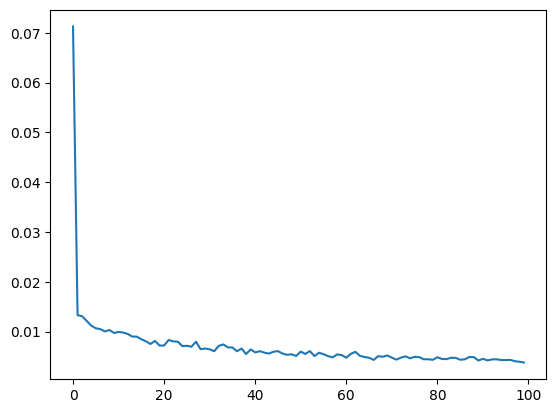

In [91]:
plt.plot(history.history['loss'])

In [92]:
closing_price = model_lstm.predict(x_valid)
scaler.fit_transform(pd.DataFrame(valid['close'].values))

# Денормализация
closing_price = scaler.inverse_transform(closing_price)
y_valid = scaler.inverse_transform([y_valid])

closing_price.shape, y_valid.shape

8/8 [==============================] - 1s 5ms/step


((250, 1), (1, 250))

In [96]:
rms = np.sqrt(np.mean(np.power((y_valid - closing_price), 2)))

rms

4891.525978393007

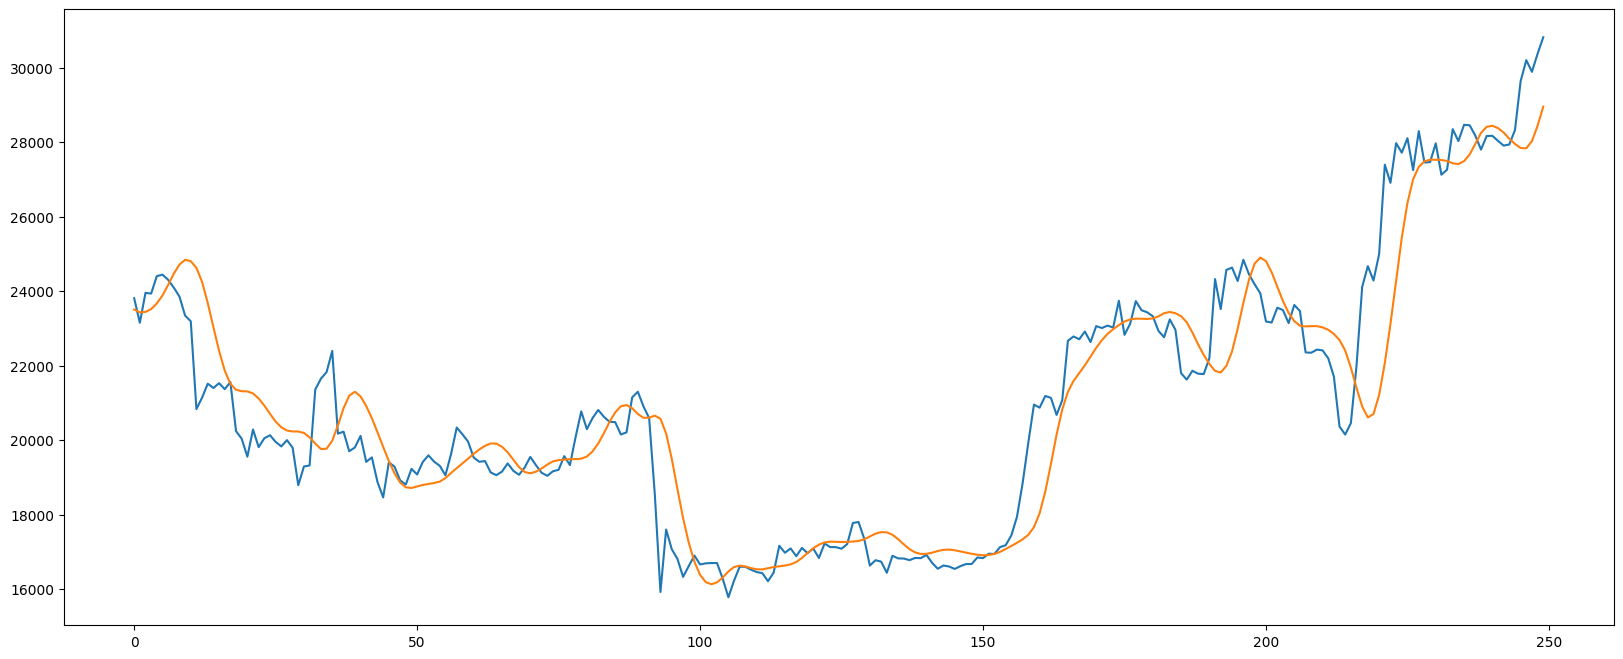

In [97]:
plt.figure(figsize=(20, 8))
dict_data = {
    'Predictions': closing_price.reshape(1,-1)[0],
    'Close': y_valid[0]
}
data_pd = pd.DataFrame(dict_data)
 
 
 
 
plt.plot(data_pd[['Close', 'Predictions']])
